In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder
train = pd.read_csv("mertrain.csv")
test = pd.read_csv("mertest.csv")

# process columns, apply LabelEncoder to categorical features
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values) + list(test[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

# shape        
print('Shape train: {}\nShape test: {}'.format(train.shape, test.shape))

Shape train: (4209, 378)
Shape test: (4209, 377)


In [4]:
n_comp = 10
pca = PCA(n_components=n_comp, random_state=420)
pca2_results_train = pca.fit_transform(train.drop(["y"], axis=1))
pca2_results_test = pca.transform(test)

In [5]:
U, S, V = np.linalg.svd(train.drop(['y'],axis=1))
eigvals = S**2/np.cumsum(S)[-1]

eigvals2 = S**2 


In [6]:
sum(list(S)[:6])

319444.85539133911

In [7]:
S

array([  3.15386340e+05,   1.67182196e+03,   8.94536298e+02,
         5.83115714e+02,   4.71499194e+02,   4.37542386e+02,
         2.14016499e+02,   1.33847204e+02,   1.09335216e+02,
         9.27303942e+01,   7.93106365e+01,   7.29010049e+01,
         7.08146224e+01,   6.58310475e+01,   5.85132895e+01,
         5.56561657e+01,   5.11311068e+01,   4.64848414e+01,
         4.50278378e+01,   4.29246723e+01,   4.14768486e+01,
         3.97130479e+01,   3.75175744e+01,   3.66303513e+01,
         3.50651433e+01,   3.30229846e+01,   3.24285449e+01,
         3.10377069e+01,   3.01757049e+01,   2.90704754e+01,
         2.87191518e+01,   2.82157377e+01,   2.72045051e+01,
         2.64024764e+01,   2.54413966e+01,   2.51715645e+01,
         2.43907138e+01,   2.35660644e+01,   2.22649346e+01,
         2.17886023e+01,   2.15050705e+01,   2.09513082e+01,
         2.04193810e+01,   1.99266007e+01,   1.98428360e+01,
         1.97539611e+01,   1.93834330e+01,   1.85012605e+01,
         1.82256170e+01,

In [8]:
pist=[]
for i in range(len(S)):
     pist.append(sum(list(S)[: i ]) / sum(list(S)[:(len(S))]))
pist=np.array(pist)
pist=np.delete(pist,0)

In [9]:
len(S)

377

In [10]:
pist

array([ 0.9777747 ,  0.98295775,  0.98573103,  0.98753884,  0.9890006 ,
        0.99035709,  0.99102059,  0.99143555,  0.99177452,  0.992062  ,
        0.99230788,  0.9925339 ,  0.99275344,  0.99295753,  0.99313894,
        0.99331148,  0.99347   ,  0.99361412,  0.99375371,  0.99388679,
        0.99401538,  0.9941385 ,  0.99425481,  0.99436838,  0.99447709,
        0.99457947,  0.99468   ,  0.99477623,  0.99486978,  0.9949599 ,
        0.99504894,  0.99513642,  0.99522076,  0.99530261,  0.99538149,
        0.99545952,  0.99553514,  0.9956082 ,  0.99567723,  0.99574478,
        0.99581145,  0.9958764 ,  0.99593971,  0.99600149,  0.996063  ,
        0.99612425,  0.99618434,  0.9962417 ,  0.9962982 ,  0.9963538 ,
        0.99640838,  0.99646278,  0.99651617,  0.99656875,  0.99662063,
        0.99667102,  0.99672021,  0.99676835,  0.99681624,  0.99686319,
        0.99690985,  0.9969557 ,  0.9970003 ,  0.99704443,  0.99708767,
        0.99713065,  0.99717201,  0.99721284,  0.99725329,  0.99

In [25]:
pist1=[]
for i in range(len(list(pist))):
    if list(pist)[i] <0.998:
         pist1.append(list(pist)[i])
pist1=np.array(pist1)

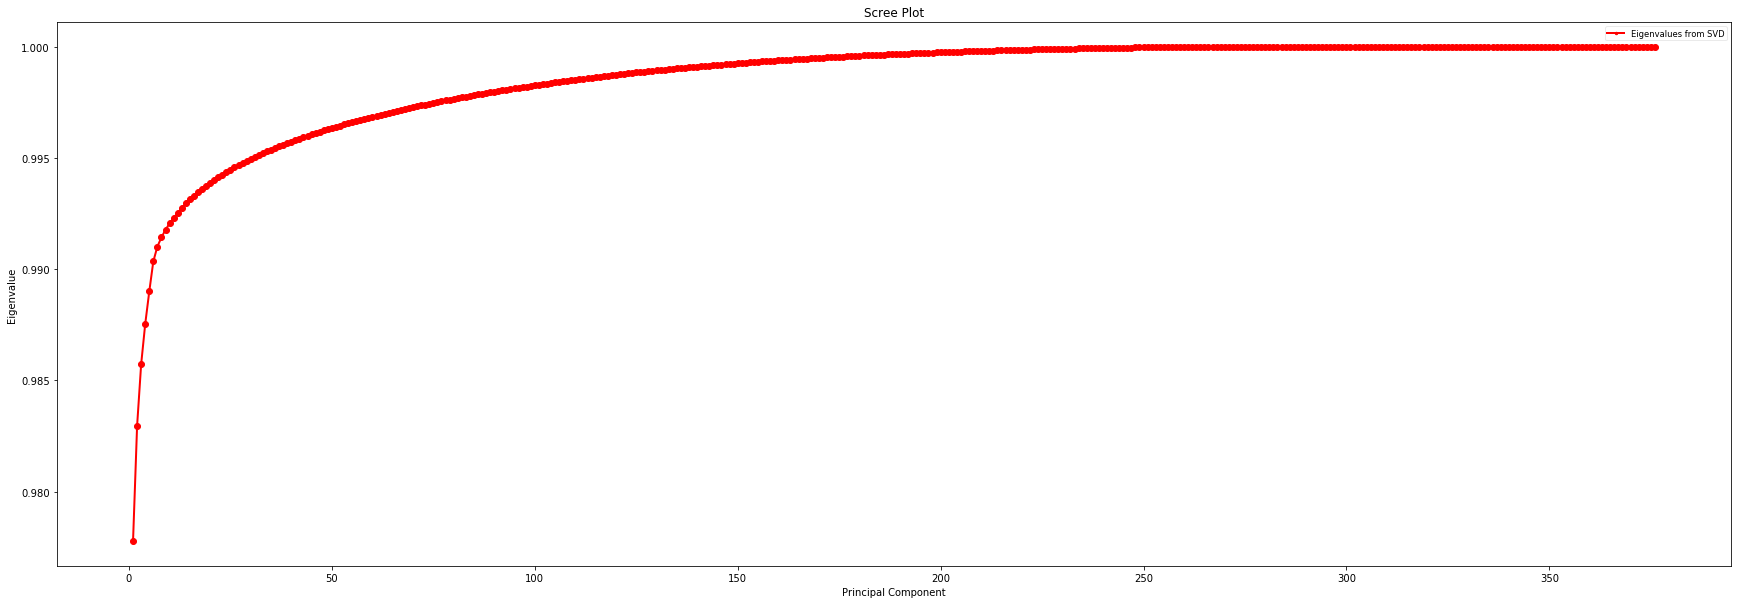

In [26]:
ig = plt.figure(figsize=(30,10))
sing_vals = np.arange(len(pist) )+1
plt.plot(sing_vals, pist, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3,
                 shadow=False, prop= matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

In [27]:
len(pist1)

90

In [14]:
pist1

array([ 0.9777747 ,  0.98295775,  0.98573103,  0.98753884,  0.9890006 ,
        0.99035709,  0.99102059,  0.99143555,  0.99177452,  0.992062  ,
        0.99230788,  0.9925339 ,  0.99275344,  0.99295753,  0.99313894,
        0.99331148,  0.99347   ,  0.99361412,  0.99375371,  0.99388679,
        0.99401538,  0.9941385 ,  0.99425481,  0.99436838,  0.99447709,
        0.99457947,  0.99468   ,  0.99477623,  0.99486978,  0.9949599 ])

In [15]:
eigvals1=[]
for i in list(eigvals):
    if i <0.04 and i >0.0012 :
         eigvals1[len(eigvals1):]=[i]

In [16]:
eigvals1=np.array(eigvals1)

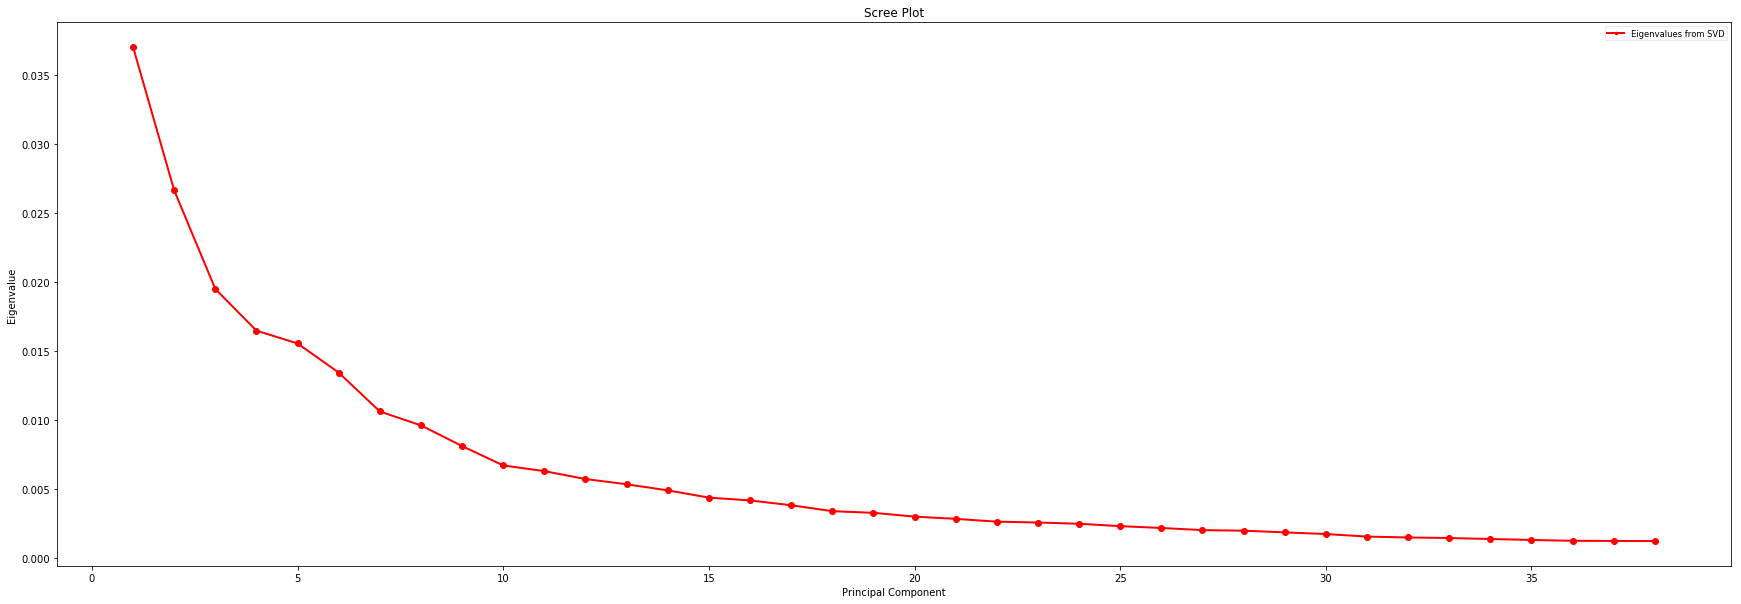

In [17]:
ig = plt.figure(figsize=(30,10))
sing_vals = np.arange(len(eigvals1) )+1
plt.plot(sing_vals, eigvals1, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3,
                 shadow=False, prop= matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

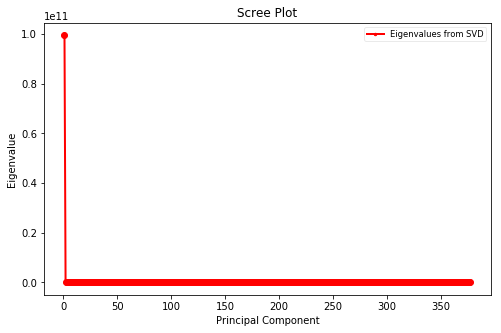

In [18]:
ig = plt.figure(figsize=(8,5))
sing_vals = np.arange(len(eigvals2)) + 1
plt.plot(sing_vals, eigvals2, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3,
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()